## Imports

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#import np.array as array



In [45]:
#############################Gather Data from csv ##################################################
# True DOA Data
df=pd.read_csv(r'C:\Users\rferr\University of Massachusetts Dartmouth\Michael R Bisbano - ECE457_Senior_Design\CSV_Files\StbdTesting_1404_002_FINAL.csv')
df_predicted=pd.read_csv(r'C:\Users\rferr\University of Massachusetts Dartmouth\Michael R Bisbano - ECE457_Senior_Design\AIOutput_CSV_Files\PredictedOutputTest1.csv')



In [46]:
df

,PingNum,SampleNum,PortStbd,SampleTimeDelay,I1,Q1,I2,Q2,I3,Q3,...,I10,Q10,Roll,C,DOA,TWTT,Amplitude,AngleUncertainty,SampleRate,Range
0,87443,24,1,0.000353,0.0625,0.0000,0.3125,-0.1875,0.3750,-0.3750,...,0.1875,0.0000,0.488892,1492.040,-55.834999,0.000353,0,180,65108.40625,0.263537
1,87443,25,1,0.000369,0.0000,-0.0625,-0.2500,-0.3125,-0.4375,-0.4375,...,0.0000,-0.1875,0.488892,1492.040,-55.834999,0.000369,0,191,65108.40625,0.274995
2,87443,26,1,0.000384,-0.0625,0.0000,-0.3750,0.3125,-0.4375,0.5625,...,-0.2500,0.0000,0.488892,1492.040,-55.834999,0.000384,0,255,65108.40625,0.286453
3,87443,27,1,0.000399,-0.0625,0.1250,0.3125,0.3750,0.5625,0.5000,...,0.0000,0.3125,0.488892,1492.040,-55.834999,0.000399,12,255,65108.40625,0.297911
4,87443,28,1,0.000415,0.1250,0.1875,0.4375,-0.2500,0.5000,-0.5625,...,0.3750,0.0000,0.488892,1492.040,-70.369998,0.000415,12,190,65108.40625,0.309369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5480113,88723,4297,1,0.065982,-65.3750,46.4375,17.5625,71.1875,58.5625,22.2500,...,-68.0625,-48.0625,1.016235,1491.949,-82.629998,0.065982,90,68,65108.40625,49.221089
5480114,88723,4298,1,0.065998,-13.7500,46.5000,26.4375,36.2500,45.6875,18.9375,...,-85.9375,-40.1250,1.016235,1491.949,-80.584998,0.065998,98,38,65108.40625,49.232546
5480115,88723,4299,1,0.066013,52.5625,20.5000,17.0625,-21.3125,-12.0000,-5.6250,...,-26.6875,19.9375,1.016235,1491.949,-79.484998,0.066013,92,93,65108.40625,49.244004
5480116,88723,4300,1,0.066028,48.0625,-5.5625,13.8750,-28.7500,-23.8750,-26.0625,...,36.2500,44.2500,1.016235,1491.949,-78.554998,0.066028,82,123,65108.40625,49.255461


In [47]:
df_predicted

,Unnamed: 0,PingNum,SampleNum,PortStbd,SampleTimeDelay,PredictedDOA
0,0,87443,24,1,0.000353,0.000000
1,1,87443,25,1,0.000369,0.000000
2,2,87443,26,1,0.000384,0.000000
3,3,87443,27,1,0.000399,0.000000
4,4,87443,28,1,0.000415,0.000000
...,...,...,...,...,...,...
5480113,5480113,88723,4297,1,0.065982,76.296471
5480114,5480114,88723,4298,1,0.065998,76.296471
5480115,5480115,88723,4299,1,0.066013,76.294098
5480116,5480116,88723,4300,1,0.066028,75.732391


In [49]:
true_DOA=-df.DOA
true_DOA # True DOA Data

0          55.834999
1          55.834999
2          55.834999
3          55.834999
4          70.369998
             ...    
5480113    82.629998
5480114    80.584998
5480115    79.484998
5480116    78.554998
5480117    81.114998
Name: DOA, Length: 5480118, dtype: float64

In [51]:
predicted_DOA=df_predicted.PredictedDOA
predicted_DOA

0           0.000000
1           0.000000
2           0.000000
3           0.000000
4           0.000000
             ...    
5480113    76.296471
5480114    76.296471
5480115    76.294098
5480116    75.732391
5480117    76.296455
Name: PredictedDOA, Length: 5480118, dtype: float64

In [52]:
garbage = 10 # Corresponding to number of bad samples in begininng of data set

for i in range(0,garbage-1):
    true_DOA[i]=0
true_DOA

0           0.000000
1           0.000000
2           0.000000
3           0.000000
4           0.000000
             ...    
5480113    82.629998
5480114    80.584998
5480115    79.484998
5480116    78.554998
5480117    81.114998
Name: DOA, Length: 5480118, dtype: float64

In [6]:
############ Generate Arbitary Test Data ###########################################
########### This part is completely optional, it just makes FAKE DATA ###################
import random
# This section can be adjusted based on when we get the predicted data
# For now, its just test data that i made up
test_length = true_DOA.size
test_length ## how long the data array should be
num_pings=1287

test=[test_length]

num_samples_per_ping = test_length/num_pings
num_samples_per_ping=round(num_samples_per_ping)

test_data = np.empty(test_length)
for i in range(0, test_length):
    test_data[i]=true_DOA[i]+random.randrange(-10,10)
print(test_data)


[-57.70999875 -61.70999875 -48.70999875 ... -80.5249982  -89.82499819
 -71.00499823]


In [81]:
test_length = true_DOA.size
test_length ## how long the data array should be
num_pings= abs(df.PingNum[0] - df.PingNum[test_length-1])
num_samples_per_ping = test_length/num_pings
num_samples_per_ping=round(num_samples_per_ping)

In [82]:
test_length

5480118

In [83]:
num_pings

1280

In [84]:
num_samples_per_ping

4281

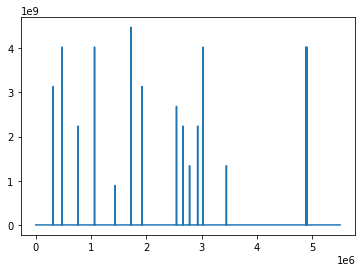

In [17]:
##### This is an optional block to run. This only shows percent error for the entire DOA data set NOT for the average of each sample #########
# It does show some interesting results if you care to see
# 

##plt.cla
#plt.figure(1)
#plt.plot(test_error)


In [85]:
# Organize Test Data and True DOA by average per sample
# Then take the percent error of those points

########### Organizing True DOA #############
true_DOA_samp=np.zeros(shape=(num_pings-1,num_samples_per_ping))
true_DOA_avg=np.zeros(shape=(num_samples_per_ping))
summ=0
# Organize by ping (ie array=ping by sample)
for p in range(0,num_pings-1):
    for s in range(0,num_samples_per_ping):
        true_DOA_samp[p,s]=true_DOA[p*num_samples_per_ping + s]
        
# Average each sample (ie each column)
for s in range(0,num_samples_per_ping):
    for r in range(0,num_pings-1):
        summ = summ + true_DOA_samp[p,s]
    true_DOA_avg[s]=summ/num_samples_per_ping   
    summ=0


In [86]:
########### Organizing Test (Predicted) DOA #############
test_DOA_samp=np.zeros(shape=(num_pings-1,num_samples_per_ping))
test_DOA_avg=np.zeros(shape=(num_samples_per_ping))
summ=0
# Organize by ping (ie array=ping by sample)
for p in range(0,num_pings-1):
    for s in range(0,num_samples_per_ping):
        test_DOA_samp[p,s]=predicted_DOA[p*num_samples_per_ping + s]
        
        
# Average each sample (ie each column)
for s in range(0,num_samples_per_ping):
    for r in range(0,num_pings-1):
        summ = summ + test_DOA_samp[p,s]
    test_DOA_avg[s]=summ/num_samples_per_ping 
    summ=0

In [87]:
true_DOA_samp

array([[ 0.        ,  0.        ,  0.        , ..., 55.63999876,
        50.40499887, 51.05499886],
       [56.30499874, 49.59499889, 49.86499889, ..., 55.71499875,
        41.90999906, 57.48499872],
       [55.30499876, 56.00999875, 56.52499874, ..., 55.83499875,
        56.91499873, 58.0499987 ],
       ...,
       [78.14499825, 78.57499824, 79.87499821, ..., 79.21499823,
        79.05999823, 79.63499822],
       [80.14499821, 79.18499823, 79.90499821, ..., 65.28999854,
        76.43999829, 79.34999823],
       [80.7499982 , 82.82499815, 82.07999817, ..., 79.66999822,
        78.12999825, 80.6249982 ]])

In [88]:
true_DOA_avg

array([24.12502866, 24.74495974, 24.52238207, ..., 23.80236574,
       23.34227231, 24.08768341])

In [89]:
test_DOA_avg

array([22.79448399, 22.79448399, 21.61960627, ..., 22.46900093,
       22.77972505, 22.79448399])

In [90]:
################ Percent Error Per Sample ###############
percent_error = np.empty(num_samples_per_ping)
for i in range(0, num_samples_per_ping):
    percent_error[i] = abs((test_DOA_avg[i]-true_DOA_avg[i])/((true_DOA_avg[i])))

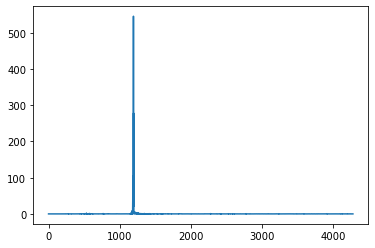

In [91]:
############### Plotting Percent Error #####################
# Plots the percent error of the average of each sample across each ping
# ie a point of data represents the percent error for a sample for all pings
# so if the x-axis=1 and y=2, there is a 200% perecent error for sample 1 averaged for all pings

plt.cla
plt.figure(1)
plt.plot(percent_error)

# Anytyhing below here is for analysis purposes

In [92]:
for i in range(0, num_samples_per_ping): 
    if percent_error[i] > 2:
        print(i)           # Prints every sample number with an average error above 200%

1164
1166
1170
1177
1178
1180
1183
1184
1185
1186
1190
1191
1192
1193
1194
1195
1196
1197
1198
1199
1200
1201
1204
1207
1208
1209
1210
1212
1213
1218
1219
1221
1223
1224
1225
1226
1227
1228
1229
1230
1233
1234
1245
1246
1247
1249
1250


In [94]:
test_DOA_avg[1208]           # Predicted DOA at one of the above samples

22.352556880459943

In [95]:
true_DOA_avg[1208]          # True DOA at one of the above samples

3.2624806558795556